In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler,MinMaxScaler
%matplotlib inline

In [2]:
nyc = pd.read_csv("/home/mcorral/Downloads/Eliot/nyc-rolling-sales.csv")

In [3]:
nyc=nyc.drop(['Unnamed: 0'],axis=1)

In [4]:
land = nyc['LAND SQUARE FEET'].replace(' -  ',0).astype(int)
gros = nyc['GROSS SQUARE FEET'].replace(' -  ',0).astype(int)
prices = nyc['SALE PRICE'].replace(' -  ',0).astype(int)

In [5]:
nyc['land_square'] = land
nyc['gross_square'] = gros
nyc['prices'] = prices

In [6]:
nyc=nyc.drop(['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb3dcd9ef0>,
      dtype=object)

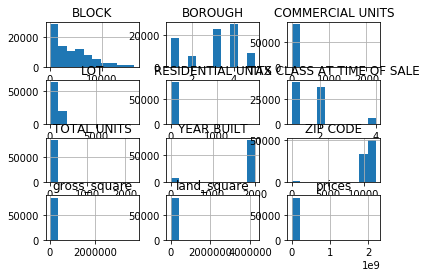

In [9]:
nyc.hist()

In [8]:
nyc_c =  ['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','YEAR BUILT','TAX CLASS AT TIME OF SALE','land_square','gross_square','prices']
nyc_d = [x for x in nyc.columns if x not in nyc_c]

## Imputacion

In [29]:
for x in nyc_c:
    nyc[x] = nyc[x].replace(0,nyc[x].mean())

In [19]:
nyc['RESIDENTIAL UNITS']=nyc['RESIDENTIAL UNITS'].fillna(nyc['RESIDENTIAL UNITS'].mean())
nyc['COMMERCIAL UNITS']=nyc['COMMERCIAL UNITS'].fillna(nyc['COMMERCIAL UNITS'].mean())
nyc['YEAR BUILT']=nyc['YEAR BUILT'].fillna(nyc['YEAR BUILT'].mean())
nyc['TAX CLASS AT TIME OF SALE']=nyc['TAX CLASS AT TIME OF SALE'].fillna(nyc['TAX CLASS AT TIME OF SALE'].mean())
nyc['land_square']=nyc['land_square'].fillna(nyc['land_square'].mean())
nyc['gross_square']=nyc['gross_square'].fillna(nyc['gross_square'].mean())
nyc['prices']=nyc['prices'].fillna(nyc['prices'].mean())


In [21]:
nyc['prices']=nyc['prices'].fillna(nyc['prices'].mean())

In [30]:
nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,land_square,gross_square,prices
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5.000000,0.193559,5.000000,1900.0,2,C2,2017-07-19 00:00:00,1633.000000,6440.000000,6.625000e+06
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28.000000,3.000000,31.000000,1900.0,2,C7,2016-12-14 00:00:00,4616.000000,18690.000000,1.056623e+06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16.000000,1.000000,17.000000,1900.0,2,C7,2016-12-09 00:00:00,2212.000000,7803.000000,1.056623e+06
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10.000000,0.193559,10.000000,1913.0,2,C4,2016-09-23 00:00:00,2272.000000,6794.000000,3.936272e+06
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6.000000,0.193559,6.000000,1900.0,2,C2,2016-11-17 00:00:00,2369.000000,4615.000000,8.000000e+06
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,...,20.000000,0.193559,20.000000,1900.0,2,C4,2017-07-20 00:00:00,2581.000000,9730.000000,1.056623e+06
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8.000000,0.193559,8.000000,1920.0,2,C4,2016-09-23 00:00:00,1750.000000,4226.000000,3.192840e+06
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,...,44.000000,2.000000,46.000000,1900.0,2,C7,2017-07-20 00:00:00,5163.000000,21007.000000,1.056623e+06
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,...,15.000000,0.193559,15.000000,1920.0,2,D5,2017-06-20 00:00:00,1534.000000,9198.000000,1.056623e+06
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24.000000,0.193559,24.000000,1920.0,2,D9,2016-11-07 00:00:00,4489.000000,18523.000000,1.623200e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb3b25a550>,
      dtype=object)

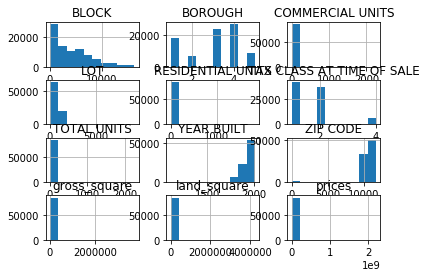

In [31]:
nyc.hist()

In [20]:
nyc[nyc_c].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84549 entries, 0 to 84549
Data columns (total 8 columns):
RESIDENTIAL UNITS            84549 non-null float64
COMMERCIAL UNITS             84549 non-null float64
TOTAL UNITS                  84549 non-null float64
YEAR BUILT                   84549 non-null float64
TAX CLASS AT TIME OF SALE    84549 non-null float64
land_square                  84549 non-null float64
gross_square                 84549 non-null float64
prices                       84549 non-null float64
dtypes: float64(8)
memory usage: 5.8 MB


### Analsis factorial y componentes principales

In [32]:
df = nyc[nyc_c]

In [33]:
sc = StandardScaler()
mm = MinMaxScaler()

In [34]:
sc.fit(df)
mm.fit(df)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
sc = StandardScaler()
sc.fit(df)
Xs = pd.DataFrame(sc.transform(df),columns=df.columns)
Xmm = pd.DataFrame(mm.transform(df),columns=df.columns)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
## Componentes principales 
pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=['p%d'%i for i in range(1,9)])

In [37]:
Xp.corr()

,p1,p2,p3,p4,p5,p6,p7,p8
p1,1.000000e+00,4.265859e-16,-1.119943e-16,-5.306944e-16,4.324616e-15,6.725283e-15,4.683416e-15,-2.295858e-13
p2,4.265859e-16,1.000000e+00,1.153530e-14,-2.693675e-15,9.134474e-15,1.138415e-15,2.009197e-15,-8.442973e-15
p3,-1.119943e-16,1.153530e-14,1.000000e+00,1.379999e-15,4.800913e-15,5.017479e-16,-5.388713e-16,1.869117e-14
p4,-5.306944e-16,-2.693675e-15,1.379999e-15,1.000000e+00,-2.134324e-15,-3.660633e-16,3.367232e-16,1.323479e-14
p5,4.324616e-15,9.134474e-15,4.800913e-15,-2.134324e-15,1.000000e+00,-6.249745e-16,3.513852e-15,4.779526e-15
p6,6.725283e-15,1.138415e-15,5.017479e-16,-3.660633e-16,-6.249745e-16,1.000000e+00,-2.610141e-15,4.255216e-14
p7,4.683416e-15,2.009197e-15,-5.388713e-16,3.367232e-16,3.513852e-15,-2.610141e-15,1.000000e+00,1.346714e-14
p8,-2.295858e-13,-8.442973e-15,1.869117e-14,1.323479e-14,4.779526e-15,4.255216e-14,1.346714e-14,1.000000e+00


In [38]:
pca.explained_variance_ratio_

array([3.62832882e-01, 1.41441851e-01, 1.35081000e-01, 1.25560149e-01,
       1.14591447e-01, 8.73505376e-02, 3.31256038e-02, 1.65283390e-05])

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36283288, 0.50427473, 0.63935573, 0.76491588, 0.87950733,
       0.96685787, 0.99998347, 1.        ])

In [40]:
## Factores 

fa =FactorAnalyzer()

fa.analyze(Xs,2,rotation='varimax')

fa.loadings

,Factor1,Factor2
RESIDENTIAL UNITS,0.587197,0.590913
COMMERCIAL UNITS,-0.097700,0.427851
TOTAL UNITS,0.389264,0.968314
YEAR BUILT,0.002935,0.005470
TAX CLASS AT TIME OF SALE,0.091405,0.012418
land_square,0.466386,0.202881
gross_square,0.963739,0.270011
prices,0.277327,-0.005043


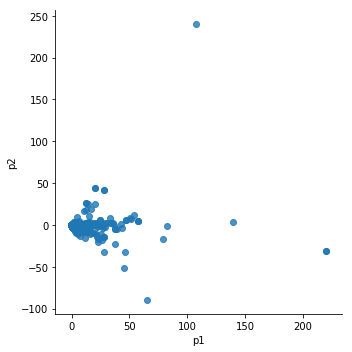

In [41]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [42]:
lst_in =[]
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

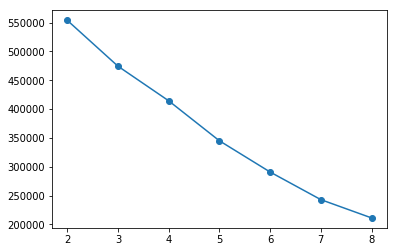

In [43]:
plt.plot(range(2,9),lst_in,marker='o')

In [66]:
gmm = GaussianMixture(n_components=8)

gmm.fit(Xs)

Xs['gmm']=gmm.predict(Xs)
Xp['gmm']=gmm.predict(Xs)

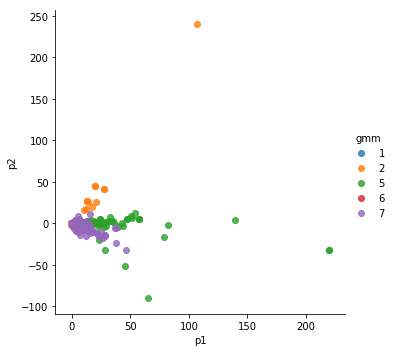

In [67]:
sns.lmplot('p1','p2',Xp,hue='gmm',fit_reg=False)

In [68]:
Xs.groupby('gmm').mean()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,land_square,gross_square,prices
gmm,,,,,,,,
0,-0.080954,-0.020879,-0.076428,-2.676975,-0.008834,-0.029887,-0.043785,-0.041352
1,-0.047438,-0.017609,-0.048112,0.097707,-0.727981,-0.027496,-0.065283,-0.053746
2,0.146823,0.084869,0.133380,-0.206453,1.968717,-0.000071,0.066093,0.123905
3,-0.035603,259.567013,119.268331,-0.305463,2.859040,-0.027368,0.018796,-0.101415
4,110.431738,2.482957,98.406376,0.638228,0.418040,121.238892,130.435771,-0.055520
5,3.505138,0.103899,3.139846,-0.177959,0.432418,0.778028,2.091873,1.439826
6,-0.060103,-0.020879,-0.054055,0.339074,0.418040,-0.033745,-0.043785,-0.029172
7,-0.035611,0.544121,0.140633,-0.062995,2.859040,1.955611,2.463248,1.601392


## perfilamiento con variables discretas

In [69]:
nyc_d

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE DATE']

In [71]:
direccion = Xs.merge(nyc[['ADDRESS']],how='left',left_index=True,right_index=True)
vecindario = Xs.merge(nyc[['NEIGHBORHOOD']],how='left',left_index=True,right_index=True)
clase = Xs.merge(nyc[['BUILDING CLASS CATEGORY']],how='left',left_index=True,right_index=True)

In [74]:
aux = direccion.pivot_table(index='ADDRESS',columns='gmm',aggfunc='count',values='prices').fillna(0).reset_index()

In [75]:
for x in range(4):
    aux[x]= aux[x]/aux.sum(axis = 1)

In [76]:
aux

gmm,ADDRESS,0,1,2,3,4,5,6,7
0,****** 95TH STREET,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1 12TH ST EXTENSION,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,1 5 AVENUE,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
3,"1 5TH AVENUE, 23A",0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
4,"1 ASCAN AVE, 35",0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
5,"1 ASCAN AVENUE, 26",0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
6,"1 ASCAN AVENUE, 31",0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
7,"1 ASCAN AVENUE, 36",0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
8,1 BAY CLUB DRIVE,0.000000,0.0,0.000000,0.0,0.0,0.0,33.0,0.0
9,1 BAYCLUB DRIVE,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0


In [70]:
nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,land_square,gross_square,prices
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5.000000,0.193559,5.000000,1900.0,2,C2,2017-07-19 00:00:00,1633.000000,6440.000000,6.625000e+06
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28.000000,3.000000,31.000000,1900.0,2,C7,2016-12-14 00:00:00,4616.000000,18690.000000,1.056623e+06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16.000000,1.000000,17.000000,1900.0,2,C7,2016-12-09 00:00:00,2212.000000,7803.000000,1.056623e+06
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10.000000,0.193559,10.000000,1913.0,2,C4,2016-09-23 00:00:00,2272.000000,6794.000000,3.936272e+06
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6.000000,0.193559,6.000000,1900.0,2,C2,2016-11-17 00:00:00,2369.000000,4615.000000,8.000000e+06
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,...,20.000000,0.193559,20.000000,1900.0,2,C4,2017-07-20 00:00:00,2581.000000,9730.000000,1.056623e+06
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8.000000,0.193559,8.000000,1920.0,2,C4,2016-09-23 00:00:00,1750.000000,4226.000000,3.192840e+06
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,...,44.000000,2.000000,46.000000,1900.0,2,C7,2017-07-20 00:00:00,5163.000000,21007.000000,1.056623e+06
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,...,15.000000,0.193559,15.000000,1920.0,2,D5,2017-06-20 00:00:00,1534.000000,9198.000000,1.056623e+06
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24.000000,0.193559,24.000000,1920.0,2,D9,2016-11-07 00:00:00,4489.000000,18523.000000,1.623200e+07
